# Simple SCAM Cases Comparison Plotting Scripts

In [1]:
""" ########################### """
""" ###     FUNCTIONS     ##### """
""" ########################### """

def moving_average(x, w):
    return np.convolve(x, np.ones(w),'same') / w

In [2]:
import matplotlib.pyplot as mp
from matplotlib import gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sb
import numpy as np
import pandas as pd
import cftime as cft
import nc_time_axis as nct # Provides pretty time axes on plots

import datetime as dt
import metpy.calc as mpy
from metpy.units import units
import metpy.constants as mconst
import scipy as stats

import xarray as xr
from pylab import *


from distributed import Client, LocalCluster

# My utils
import importlib
#import scam_plot_cases_utils as mypy

In [35]:
## Constants ##
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air
grav = mconst.earth_gravity.magnitude       # Gravity ave.
Lv = mconst.water_heat_vaporization.magnitude       # Latent heat of vaporization


## SIMPLE PLOTS ##
my_dir = "/glade/work/rneale/scam_cases/"
pdir = my_dir+"cases/"
odir = my_dir+"iops/"
fig_dir = my_dir+"figs/"

#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']


fig_pref = 'scam_pbl+KE_parcel'


#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100b','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101b']
#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.002','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L32','FSCAM.T42_T42.togaII.001.L256']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=3)','CAM6 (#CIN=5)','CAM6 (L32)','CAM6 (L256)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.nolev1zm','FSCAM.T42_T42.togaII.zm.ke002']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L256)','CAM6 (L256-nolev1zm)','CAM6 (tfreez=-10)','FSCAM.T42_T42.togaII.001']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L64','FSCAM.T42_T42.arm97.001','FSCAM.T42_T42.arm97.001.L64']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L64,#CIN=1)','CAM6 (ARM97)','CAM6 (ARM97, L64)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.org00']
#cnames = ['CAM6','CAM6 (zm_org)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.sflux01','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.sflux01','FSCAM.T42_T42.togaII.001.sflux2']
#cnames = ['CAM6','CAM6 (5m ref.)','CAM6 (L256)','CAM6 (L256, 5m ref.)','CAM6 (Zheng scheme)']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.par001']
#cnames = ['CAM6','CAM6-KE.ZM','CAM6-PBLpar']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L48','FSCAM.T42_T42.togaII.zm.ke000.L58','FSCAM.T42_T42.togaII.zm.ke010',
#        'FSCAM.T42_T42.togaII.zm.ke008.L48','FSCAM.T42_T42.togaII.zm.ke009.L48','FSCAM.T42_T42.togaII.zm.ke009.L58','FSCAM.T42_T42.togaII.zm.ke010.L58']
#cnames = ['L32-ctrl','L48-ctrl','L58-ctrl','L32-KE010','L48-KE008','L48-KE009','L58-KE009','L58-KE010']



#cases = ['FSCAM.T42_T42.togaII.zm.ke000.L58','FSCAM.T42_T42.togaII.zm.ke010.L58']
#cnames = ['CAM6 (L58)','KEparcel (L58)']


#cases = ['FSCAM.T42_T42.togaII.cam_ke.000','FSCAM.T42_T42.togaII.cam_ke.001','FSCAM.T42_T42.togaII.cam_ke.001.L48','FSCAM.T42_T42.togaII.cam_ke.002.L48']
#cnames = ['CAM6 (L58)','KEparcel (L58)','KEparcel (L48)','KEparcel+PBLparcel (L48)']

#cases = ['FSCAM.T42_T42.arm97.cam_ke.000','FSCAM.T42_T42.arm97.cam_ke.001','FSCAM.T42_T42.arm97.cam_ke.001.L48']
#cnames =  ['CAM6 (L58)','KEparcel (L58)','KEparcel (L48)']

#cases = ['FSCAM.T42_T42.togaII.cam_ke.001','FSCAM.T42_T42.togaII.cam_ke.001.L48','FSCAM.T42_T42.togaII.cam_ke.001.L32']
#cnames =  ['KEparcel (L58)','KEparcel (L48)','KEparcel (L32)']


#cases = ['FSCAM.T42_T42.togaII.cam_ke.000','FSCAM.T42_T42.togaII.cam_ke.000.L48','FSCAM.T42_T42.togaII.cam_ke.000.L32']
#cnames =  ['L58','L48','L32']


#cases = ['FSCAM.T42_T42.togaII.cam_ke.000','FSCAM.T42_T42.togaII.cam_ke.000.L48','FSCAM.T42_T42.togaII.cam_ke.000.L32','FSCAM.T42_T42.togaII.cam_ke.001','FSCAM.T42_T42.togaII.cam_ke.001.L48','FSCAM.T42_T42.togaII.cam_ke.001.L32']
#cases = ['FSCAM.T42_T42.arm97.cam_ke.000','FSCAM.T42_T42.arm97.cam_ke.000.L48','FSCAM.T42_T42.arm97.cam_ke.000.L32','FSCAM.T42_T42.arm97.cam_ke.001','FSCAM.T42_T42.arm97.cam_ke.001.L48','FSCAM.T42_T42.arm97.cam_ke.001.L32']


#cnames =  ['L58','L48','L32','KEparcel (L58)','KEparcel (L48)','KEparcel (L32)']


cases = ['FSCAM.T42_T42.togaII.cam_ke.000','FSCAM.T42_T42.togaII.cam_ke.002','FSCAM.T42_T42.togaII.cam_ke.003','FSCAM.T42_T42.togaII.cam_ke.004']

#cases = ['FSCAM.T42_T42.arm97.cam_ke.000','FSCAM.T42_T42.arm97.cam_ke.002','FSCAM.T42_T42.arm97.cam_ke.003','FSCAM.T42_T42.arm97.cam_ke.004']
cnames =  ['L58','KEparcel (L58)','PBL Parcel (L58)','KE/PBL Parcel (L58)']



#cases = ['FSCAM.T42_T42.togaII.cam_ke.000','FSCAM.T42_T42.togaII.cam_ke.000.L32','cesm1_cam5','cesm1_cam4','scam_undilute']
#cnames = ['CAM6-L58','CAM6','CAM5','CAM4','CAM3']






#cases = ['FSCAM.T42_T42.rico.000','FSCAM.T42_T42.rico.001']
#cnames = ['CAM6-000','CAM6-001']

# Plots variable
ldiff_plot = False
lvavratio_plot = False
plot_top = 50. # Top of plots in mb.

smooth_tstep = 10 # Timesteps to smooth over for plitting

ovar1d = None ; ovar2d = None # If it does not stay None the plot obs
vscale = 1 ; ovscale1d = 1. ; ovscale2d = 2.


'''
    Variables 
'''

## Derived varibale set
vderived = ['MSE'] # Derived variables that have to be calculated

'''

###### 2D fields ######

'''


## Variable to be plotted.

#vname = 'RELHUM'   ; vscale = 1. ; units2d='%' ; cmin = 50 ; cmax = 120. ; cmap = 'YlGnBu'
#vname = 'Q'   ; vscale = 1000. ; units2d='g/kg' ; cmin = 0.001 ; cmax = 30. ; cmap = 'YlGnBu' ; ovar2d = 'q' ;ovscale2d = 1000. 
#vname = 'Q'   ; vscale = 1000. ; units2d='g/kg' ; cmin = 0.5 ; cmax = 1.5 ; cmap = 'YlGnBu' 

#vname = 'MSE'   ; vscale = 1.e-6 ; units2d='10^6 J/kg' ; cmin = 0.34 ; cmax = 0.4 ; cmap = 'YlGnBu'

#vname = 'T'   ; vscale = 1.  ; units2d='K' ; cmin = 180 ; cmax = 300. ; cmap = 'RdBu_r'; ovar2d = 'T' ; ovscale2d = 1.
#vname = 'BUOY' ; vscale = 1. ; units2d='K' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'CLOUD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 100. ; cmap = 'Purples'
#vname = 'CONCLD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 50. ; cmap = 'Purples'
#vname = 'CLDICE'   ; vscale = 1000.
#vname = 'CLDLIQ' ; vscale = 1000.
#vname = 'CLDLIQZM' ; vscale = 1000.
#vname = 'DLFZM' ; vscale = 1000.
#vname = 'QRS' ; vscale = 86400.
#vname = 'QRL'   ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'ZMDQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -6 ; cmax = 6. ; cmap = 'RdBu'
#vname = 'ZMDQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = 0.2 ; cmax = 1.8 ; cmap = 'RdBu'

vname = 'ZMDT'   ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'ZMDLF'   ; vscale = 1000.*86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'STEND_CLUBB'   ; vscale = 86400./cp_air ; units2d='K/day' ; cmin = -5 ; cmax = 20. ; cmap = 'RdBu_r'

#vname = 'RVMTEND_CLUBB'   ; vscale = 86400*1000. ; units2d='g/kg/day' ; cmin = -5. ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'WP2_CLUBB'   ; vscale = 1.; units2d='m2/s2' ; cmin = 0. ; cmax = 1. ; cmap = 'Purples'

#vname = 'DCQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -8 ; cmax = 8. ; cmap = 'RdBu_r'
#vname = 'DTCOND' ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'ZMMU' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = -10. ; cmax = 100. ; cmap = 'PuBuGn'
#vname = 'ZMMD' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = -8 ; cmax = 4. ; cmap = 'PuBuGn_r'
#vname = 'WINCLD' ; vscale = 1. ; units2d='m/s' ; cmin = 0; cmax = 20; cmap = 'Purples'
#vname = 'KEPAR'  ; vscale = 1. ; units2d='W/m2' ; cmin = -10; cmax = 100; cmap = 'RdBu_r'

'''

###### 1D fields ######

'''

#vname1d = 'SHFLX' ; vscale1d = 1. ; units1d='W/m^2' ; pmin = 0. ; pmax= 20.
#vname1d = 'LHFLX' ; vscale1d = 1. ;  units1d='W/m^2' ; pmin = 0. ; pmax= 300.  ; ovar1d = 'lhflx' ; ovscale1d = 1. 
#vname1d = 'U10' ; vscale1d = 1. ;  units1d='m/s' ; pmin = 0. ; pmax= 10.
#vname1d = 'TAUX' ; vscale1d = 1. ;  units1d='kg/m^2/s' ; pmin = -0.2 ; pmax= 0.0
#vname1d = 'ZBOT' ; vscale1d = 1. ;  units1d='m' ; pmin = 0. ; pmax= 150.
vname1d = 'PRECT' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45. ; ovar1d = 'Prec' ; ovscale1d = 86400. 
#vname1d = 'PRECZ' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45.
#vname1d = 'PRECC' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45.
#vname1d = 'PRECL' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45.
#vname1d = 'CAPE' ; vscale1d = 1. ;  units1d='J/kg' ; pmin = 0. ; pmax= 1000.
#vname1d = 'LEL' ; vscale1d = 1. ;  units1d='mb' ; pmin = 50. ; pmax= 1000.
#vname1d = 'KHMAX' ; vscale1d = 1. ;  units1d='level' ; pmin = 850. ; pmax= 1000.
#vname1d = 'PKHMAX' ; vscale1d = 1. ;  units1d='pressure' ; pmin = 800. ; pmax= 1050. # Pressure location of KHMAX

#vname1d = 'CLDLOW' ; vscale1d = 1.


Case  1  of  4
** Name =  L58
-File read =  /glade/work/rneale/scam_cases/cases/FSCAM.T42_T42.togaII.cam_ke.000/run/FSCAM.T42_T42.togaII.cam_ke.000.cam.h0.1992-12-18-64800.nc
Done...
Variable on file, read in -> FSCAM.T42_T42.togaII.cam_ke.000

Case  2  of  4
** Name =  KEparcel (L58)
-File read =  /glade/work/rneale/scam_cases/cases/FSCAM.T42_T42.togaII.cam_ke.002/run/FSCAM.T42_T42.togaII.cam_ke.002.cam.h0.1992-12-18-64800.nc
Done...
Variable on file, read in -> FSCAM.T42_T42.togaII.cam_ke.002

Case  3  of  4
** Name =  PBL Parcel (L58)
-File read =  /glade/work/rneale/scam_cases/cases/FSCAM.T42_T42.togaII.cam_ke.003/run/FSCAM.T42_T42.togaII.cam_ke.003.cam.h0.1992-12-18-64800.nc
Done...
Variable on file, read in -> FSCAM.T42_T42.togaII.cam_ke.003

Case  4  of  4
** Name =  KE/PBL Parcel (L58)
-File read =  /glade/work/rneale/scam_cases/cases/FSCAM.T42_T42.togaII.cam_ke.004/run/FSCAM.T42_T42.togaII.cam_ke.004.cam.h0.1992-12-18-64800.nc
Done...
Variable on file, read in -> FSCAM.T42_T4

/glade/scratch/rneale/ipykernel_28483/4213950259.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1d[1].set_xticklabels(cnames_all,rotation=90.)


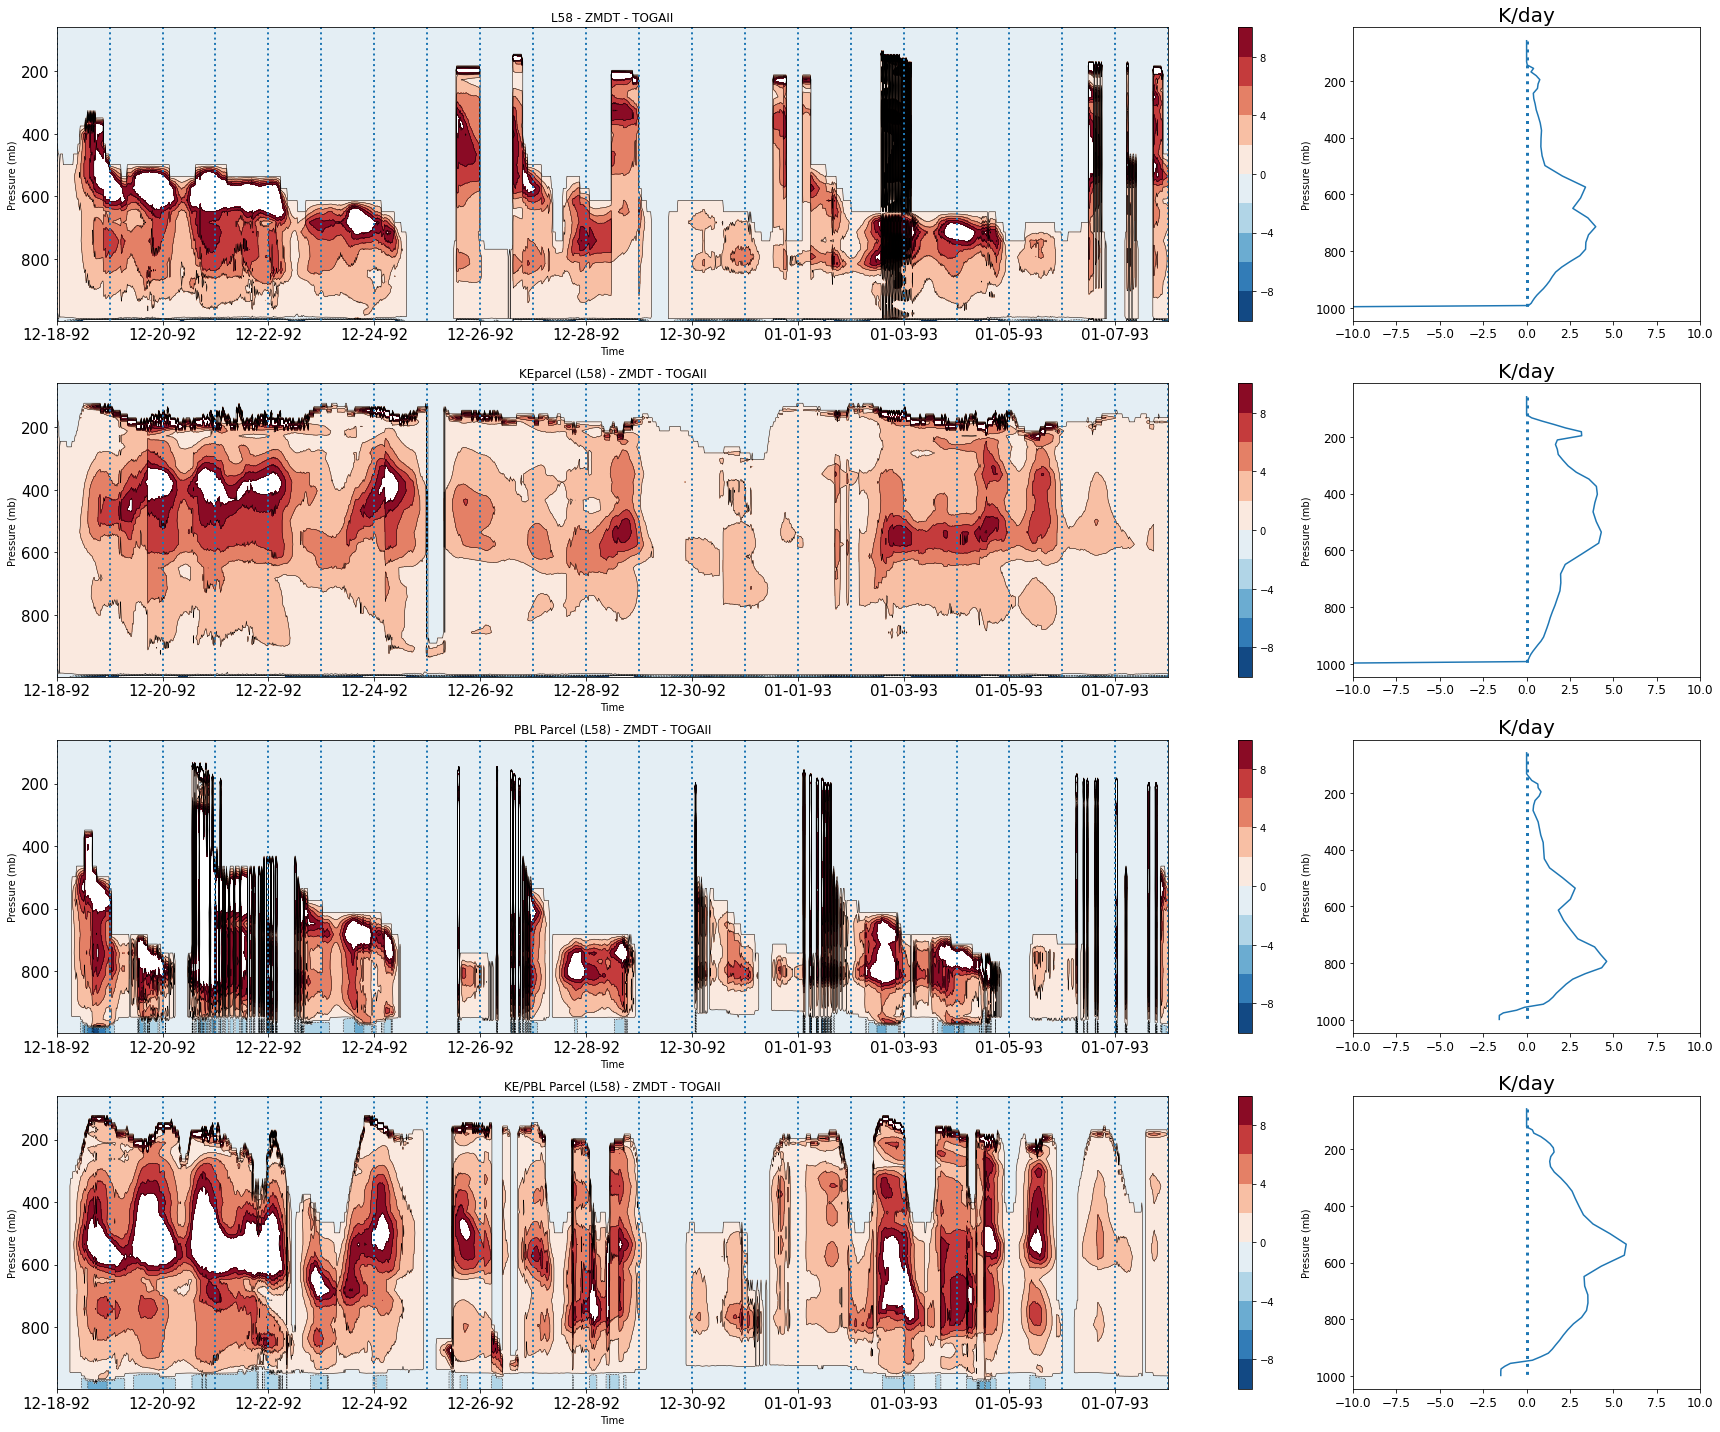

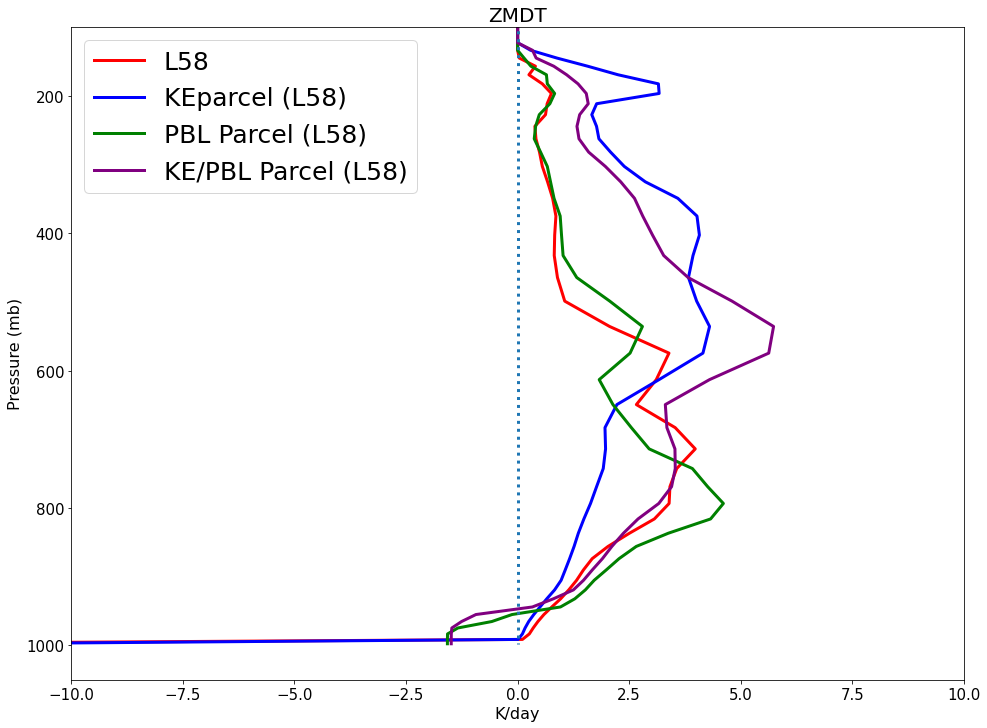

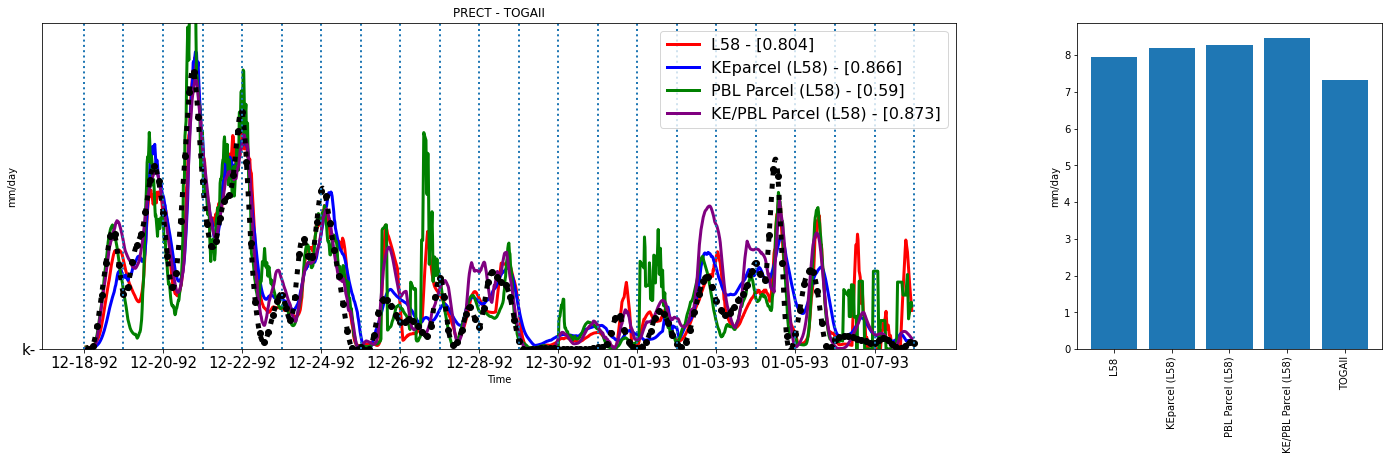

In [36]:
####
#importlib.reload(mypy) # Required to reload .py files.



rad_var = ['QRL','QRS']

# Identify IOP
if cases[0].find('togaII')!=-1 : csuf =  '.cam.h0.1992-12-18-64800.nc' ; iop = 'TOGAII' 
if cases[0].find('arm97')!=-1 : csuf =  '.cam.h0.1997-06-18-84585.nc' ; iop = 'ARM97'
if cases[0].find('rico')!=-1 : csuf =  '.cam.h0.1995-07-15-00000.nc' ; iop = 'RICO' 
if cases[0].find('gateIII')!=-1 : csuf =  '.cam.h0.1974-08-30-00000.nc' ; iop = 'GATEIII' 
    
lobs1d = False if ovar1d == None else True 
lobs2d = False if ovar2d == None else True 



if lobs1d or lobs2d: 
    obs_in = xr.open_dataset(odir+iop+'_4scam.nc')
    obs_in = obs_in.squeeze()
    if iop in ["GATEIII","TOGAII"] and ovar1d=='Prec' : ovscale1d = 86400.*1000.
    
    if lobs1d : var1d_o = ovscale1d*obs_in[ovar1d]
    var2d_o = ovscale2d*obs_in[ovar2d] if lobs2d else None
ncases = len(cases)



## Some Plot Environments ##

#plt1, ax1 = mp.subplots(ncases,2, figsize=(24,16), gridspec_kw={'width_ratios': [4, 1]})  # tseries plots
plt1, ax1 = mp.subplots(ncases,2, figsize=(24,ncases*5), gridspec_kw={'width_ratios': [4, 1]})  # tseries plots
plt1.patch.set_facecolor('white')

mp.figure(1)
plt1av, ax1av = mp.subplots(1,1,figsize=(16, 12)) # Ave plot of all cases
mp.figure(2)
plt1d, ax1d = mp.subplots(1,2,figsize=(24, 6),gridspec_kw={'width_ratios': [3, 1]}) # 1D timeseries
mp.figure(3)

plt1.patch.set_facecolor('white')
plt1av.patch.set_facecolor('white')
plt1d.patch.set_facecolor('white')


line_style = ['r','b','g','purple','b--','g--','p']
#line_style = ['k','k--','r','b','g','p']



# Edge time points to set to None (// = integer divison)
edge_tstep = smooth_tstep//2-1
nt_noedge = np.r_[0:edge_tstep,-edge_tstep:-1]










'''
    ################################# 
    #######   LOOP CASES    #########  
    #################################  
'''
    
for ic in range(0,len(cnames)):

    print('')
    print('Case ',(ic+1),' of ',ncases )
    print('** Name = ',cnames[ic])
    
    sfile = pdir+cases[ic]+"/run/"+cases[ic]+csuf
    print('-File read = ',sfile)
    scam_in = xr.open_dataset(sfile)
    scam_in = scam_in.squeeze()
    print('Done...')

    if (vname in list(scam_in.keys())): # If a varible doesn't exists just fill with NaNS
    
        print('Variable on file, read in -> '+cases[ic])

        pvar = scam_in[vname]
       
            
    elif [vname in vderived]: # Special variable
        
        print('Derived Variable on file',vname)
        
        if vname=='MSE': # Moist static energy
            pvar = cp_air*scam_in['T'] + Lv*scam_in['Q'] + grav*scam_in['Z3']  
            
    else : # just assign dummy filed from T structure
        pvar = scam_in['T']
        pvar[:,:] = np.nan
           
    if 'ilev' in list(pvar.dims) : pvar = pvar.rename({'ilev':'lev'}) # Sometimes ilev for e.g., CLUBB vars, chnage to lev for convenience

    
    
    pvar = pvar.loc[:,plot_top:]    
    pvar = pvar.transpose()*vscale
    dlev = (cmax-cmin)/10

    if ic == 0: plevels = np.arange(cmin,cmax+dlev,dlev,dtype=float)
#    plevels = [0.1,0.3,0.4,0.5,0.75,1,2,3,4,5,8,10,15,20,25,30]

### Time axes lebeling from (annoying) xarray cftime format
    tdate = pvar.time.dt.strftime("%H:%M %m-%d-%Y") # Works for time axis and labeling
    tdate_day = pvar.time.dt.strftime("%m-%d-%y") # Works for time axis and labeling
    
    nsteps_tick_span = 144
    nsteps_per_day = 72
    iticks = np.arange(0, len(tdate)+1, nsteps_tick_span)
    itick_days = np.arange(0, len(tdate)+1, nsteps_per_day)
    
    
  










    
    """ ############################ """
    """ ## Timeseries Height Plot ## """
    """ ############################ """

    mp.figure(1)

    
    if var in rad_var:
        pvar = pvar.where(pvar!=0,drop=True)
        
    

    
    plt1 = ax1[ic,0].contourf(tdate,pvar.lev,pvar,levels=plevels,cmap=cmap) 
    plt1 = mp.colorbar(plt1,ax=ax1[ic,0])
    ax1[ic,0].contour(tdate,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.5) 
#    ax1[ic,0] = mp.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    ax1[ic,0].set_title(cnames[ic],fontsize=29)
    ax1[ic,0].set_ylabel('Pressure (mb)') 
    ax1[ic,0].set_xlabel("Time")
 
    for label in (ax1[ic,0].get_xticklabels() + ax1[ic,0].get_yticklabels()):
        label.set_fontsize(15)
   

    ax1[ic,0].set_xticks(iticks)
    ax1[ic,0].set_xticklabels(tdate_day[iticks].values)
    ax1[ic,0].invert_yaxis()  
    ax1[ic,0].vlines(tdate[itick_days], min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
    ax1[ic,0].set_title(cnames[ic]+' - '+vname+' - '+iop)
    
    mp.tight_layout()
    
    
    
    
    
## Average Plot ##
    pvarm = pvar.mean(axis=1)
    
# Gather 1d timeseries variables
    if vname1d != 'PRECT':
       
        if vname1d == 'PKHMAX' :
            pvar1d = vscale1d*scam_in['KHMAX']
            pvar1d_int = pvar1d.values.astype(int)
            for itt,ill in enumerate(pvar1d_int):  pvar1d[itt] = scam_in.lev[ill-1] 

        else :
            pvar1d = vscale1d*scam_in[vname1d]
      
    else :
        pvar1d = vscale1d*(scam_in['PRECC']+scam_in['PRECL'])
    
    if (vname1d=='LEL') : # Need to change to pressure from level #.

# Convert to int and adjust downwards because of 0/1 indexing difference with fortran.
        ipvar1d = pvar1d.astype(int)-1
        for itt in range(0,len(tdate)) : pvar1d[itt]=scam_in.lev[ipvar1d[itt]]
        
   
    if ic == 0 :
        pvarm0 = pvarm
        pvarm_all = pvarm 
        pvarm0 = pvarm # Keep for a normalization plot.
        pvarm_int = pvarm0
        
        lev0 = pvarm.lev
        pvar1d_all = pvar1d # 1D timseries variables
        
    else:

        pvarm_int = pvarm.interp(lev=lev0,method="linear")
        pvarm_all = xr.concat((pvarm_all,pvarm_int),dim='case')  
        pvar1d_all = xr.concat((pvar1d_all,pvar1d),dim='case')  
        
        
        
      
    
    
    
    
    
    
        
        

        
        
    """ ########################### """
    """ ## Time-ave Height Plot  ## """
    """ ########################### """

    ax1[ic,1].plot(pvarm,pvarm.lev)
    
    
    ax1[ic,1].set_xlim([1.*cmin,1.*cmax])
    
    ax1[ic,1].set_title(units2d,fontsize = 20)
    ax1[ic,1].set_ylabel('Pressure (mb)') 
   
    ax1[ic,1].invert_yaxis()  
    
    ax1[ic,1].vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=3)
    
    for label in (ax1[ic,1].get_xticklabels() + ax1[ic,1].get_yticklabels()):
        label.set_fontsize(12)
    
    if lobs2d : # Add obs. and legend w/ obs if needed.
        ax1[ic,1].plot(var2d_o.mean(axis=0),0.01*var2d_o.lev,'ko-')  
        ax1[ic,1].legend(np.append(cnames[ic],iop) if lobs2d else cnames[ic],fontsize=15)
    
    if ic==ncases-1 : 
        mp.figure(1)
        mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_ts_'+vname+'.png', dpi=300,facecolor='white') # If last tseries plot then output.
    
# Average profiles
    mp.figure(2)
    
    if lvavratio_plot : # Ratio of first case 
        vav_pvar = pvarm_int/pvarm0 
        vav_plev = pvarm0.lev
        vav_vline = 1.
    else: # Regular plot
        vav_pvar = pvarm
        vav_plev = pvarm.lev
        vav_vline = 0.
   
    ax1av.plot(vav_pvar,vav_plev,line_style[ic],lw=3)

# 1D timeseries
    mp.figure(3)
 

#### STICK IN THE 1D TIMSERIES HERE ######

  
    pvar1d_ma = pvar1d.copy()
    pvar1d_ma.values = moving_average(pvar1d,smooth_tstep)
    pvar1d_ma[nt_noedge] = None

    
    ax1d[0].plot(tdate,pvar1d_ma,line_style[ic],lw=3)

   
  


'''
################################################### 
############## END MAIN CASE LOOP ################# 
################################################### 
'''








'''
 ########################### 
 ##   Average 2D Plot     ## 
 ########################### 
'''

mp.figure(2)

if lobs2d: ax1av.plot(var2d_o.mean(axis=0),0.01*var2d_o.lev,'ko-')
ax1av.set_ylabel('Pressure (mb)',fontsize=16) 
ax1av.set_xlim([1.*cmin,1.*cmax])

ax1av.set_xlabel(units2d,fontsize=16) 
ax1av.set_ylim([100,1050])

ax1av.tick_params(axis='x', labelsize=14)
ax1av.tick_params(axis='y', labelsize=14)

ax1av.set_title(vname,fontsize=20)
ax1av.vlines(vav_vline, min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=3)
ax1av.invert_yaxis()  
ax1av.legend(np.append(cnames,iop) if lobs2d else cnames,fontsize=25)
#ax1av.set_yscale('log')
                            
for label in (ax1av.get_xticklabels() + ax1av.get_yticklabels()):
        label.set_fontsize(15)

# % age difference plot.
#ax1av[1].plot(100.*pvarm_all[1].transpose()/pvarm_all[0].transpose(),pvarm_all.lev)  

### 2D RATIO OF CASE2/CASE1 ###

#ax1av[1].set_title('100*case2/case1',fontsize=20)
#ax1av[1].set_xlabel('%') 

#ax1av[1].vlines(100., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
#ax1av[1].invert_yaxis()

mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_aves_'+vname+'.png', dpi=200)








""" ########################### """
""" ##   Timeseries 1D Plot   ## """
""" ########################### """


# Plot obs
print(cnames)
if lobs1d:
    cnames_all = np.append(cnames,iop)
#    pvar1d_all = np.append(pvar1d_all,var1d_o.values)
    pvar1d_all = np.vstack([pvar1d_all,[var1d_o.values]])
else:
    cnames_all = np.array(cnames)
    pvar1d_all = pvar1d_all
print(cnames_all)



#ax1d[0].plot(tdate,moving_average(pvar_all[0,:].transpose(),10))  

## Still might need to solve the date problem
#odate = pd.to_datetime('19970514.567', format='%Y%m%d')
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 
#odate = [cftime.datetime(year=2017, month=2, day=n) for n in range(1, 31)]
#odate = dt.date(year=obs_in.year, month=obs_in.month, day=obs_in.day
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 

mp.figure(3)


cnames_all_ts = cnames_all
print(cnames_all)
if lobs1d:
    
    pvar1d_mo = var1d_o.copy()
    pvar1d_mo.values = moving_average(var1d_o,smooth_tstep)
    pvar1d_mo[nt_noedge] = None
    
    ax1d[0].plot(tdate,pvar1d_mo,'o:k','k-',markevery=8,lw=5)  # Line=black with x's [kx]
    pvar1d_np = np.array(pvar1d_all)
    

#    pvar1d_np.squeeze
#    var1d_o.squeeze

    cnames_all_ts=[]
    for ii in range(0,ncases):
        
        corr_case = np.corrcoef(pvar1d_np[ii,:].data,var1d_o.data)
        
        corr_val = corr_case[1,0].data        
        cnames_all_ts.append(cnames_all[ii]+' - [%s]'%np.round(corr_val,decimals=3))
        

ax1d[0].legend(cnames_all_ts,fontsize=16)


for label in (ax1d[0].get_xticklabels() + ax1d[0].get_yticklabels()):
        label.set_fontsize(15)

ax1d[0].set_xlabel("Time")
ax1d[0].set_ylabel(units1d) 
ax1d[0].set_ylim([pmin,pmax])

#ax1d[0].set_xticks(np.arange(0, len(tdate)+1, pntspan))
ax1d[0].set_xticks(iticks)
ax1d[0].set_xticklabels(tdate_day[iticks].values)

ax1d[0].vlines(tdate[itick_days], pmin,pmax, linestyle="dotted",lw=2)

# ax1d[0].xaxis.set_minor_locator(MultipleLocator(360))
# ax1d[0].xaxis.set_major_locator(MultipleLocator(72))
ax1d[0].set_title(vname1d+' - '+iop)



if vname1d == 'LEL':
    
#    lel_range = np.arange(pvar_all.values.min(),pvar_all.values.max()) # Range of lel
#    lel_range = lel_range.astype(int)

#    ax1d[0].set_yticks(lel_range)
#    ax1d[0].set_yticklabels(scam_in.lev[lel_range].values.astype(int))
    
    ax1d[0].invert_yaxis()

if vname1d=='PKHMAX': ax1d[0].invert_yaxis()

    
""" ########################### """
""" ### Average bar chart ##### """
""" ########################### """


ax1d[1].bar(cnames_all,pvar1d_all.mean(axis=1))
ax1d[1].set_ylabel(units1d,fontsize=10) 
ax1d[1].set_xticklabels(cnames_all,rotation=90.)

mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_1d_'+vname1d+'.png', dpi=400)